# Fraud Detection

### Instalación de librerias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de dataset.

In [2]:
#fraud_det_1 = pd.read_csv("C:/Users/juacevedo.ATLANTICQI/Downloads/train_identity.csv")
#fraud_det_2 = pd.read_csv("C:/Users/juacevedo.ATLANTICQI/Downloads/train_transaction.csv")
#fraud_det=pd.merge(fraud_det_1, fraud_det_2, on='TransactionID', how='left')
fraud_det = pd.read_csv("C:/Users/juacevedo.ATLANTICQI/Downloads/train_transaction.csv")

## EDA

### Previsualizacion de dataset

In [3]:
fraud_det.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
fraud_det.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590539,3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Forma del data set

In [5]:
fraud_det.shape

(590540, 394)

El dataset tiene 590.540 filas y 394 columnas

### Identificaremos el tipo de datos de cada variable.

In [6]:
fraud_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


El dataset presenta:

376 columnas de tipo float.

14 columnas de tipo categoricas.

4 columnas de tipo entero.

### Descripcion de variables

In [7]:
fraud_det.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
...,...,...,...,...,...,...,...,...
V335,82351.0,5.916455e+01,3.876295e+02,0.000,0.000,0.000,0.00,5.512500e+04
V336,82351.0,2.853090e+01,2.745769e+02,0.000,0.000,0.000,0.00,5.512500e+04
V337,82351.0,5.535242e+01,6.684868e+02,0.000,0.000,0.000,0.00,1.040600e+05
V338,82351.0,1.511605e+02,1.095034e+03,0.000,0.000,0.000,0.00,1.040600e+05


### Conteo de datos faltantes

In [8]:
# Calcular datos faltantes
missing_data = fraud_det.isnull().sum()

# Calcular el porcentaje de datos faltantes
missing_percentage = (missing_data / len(fraud_det)) * 100

# Crear un DataFrame para mostrar los resultados
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage
})

# Ordenar el DataFrame en función del porcentaje de datos faltantes
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_df  # Mostrando solo las primeras 10 filas por brevedad


,Missing Values,Percentage (%)
dist2,552913,93.628374
D7,551623,93.409930
D13,528588,89.509263
D14,528353,89.469469
D12,525823,89.041047
...,...,...
V307,12,0.002032
V308,12,0.002032
V309,12,0.002032
V279,12,0.002032


### Histograma

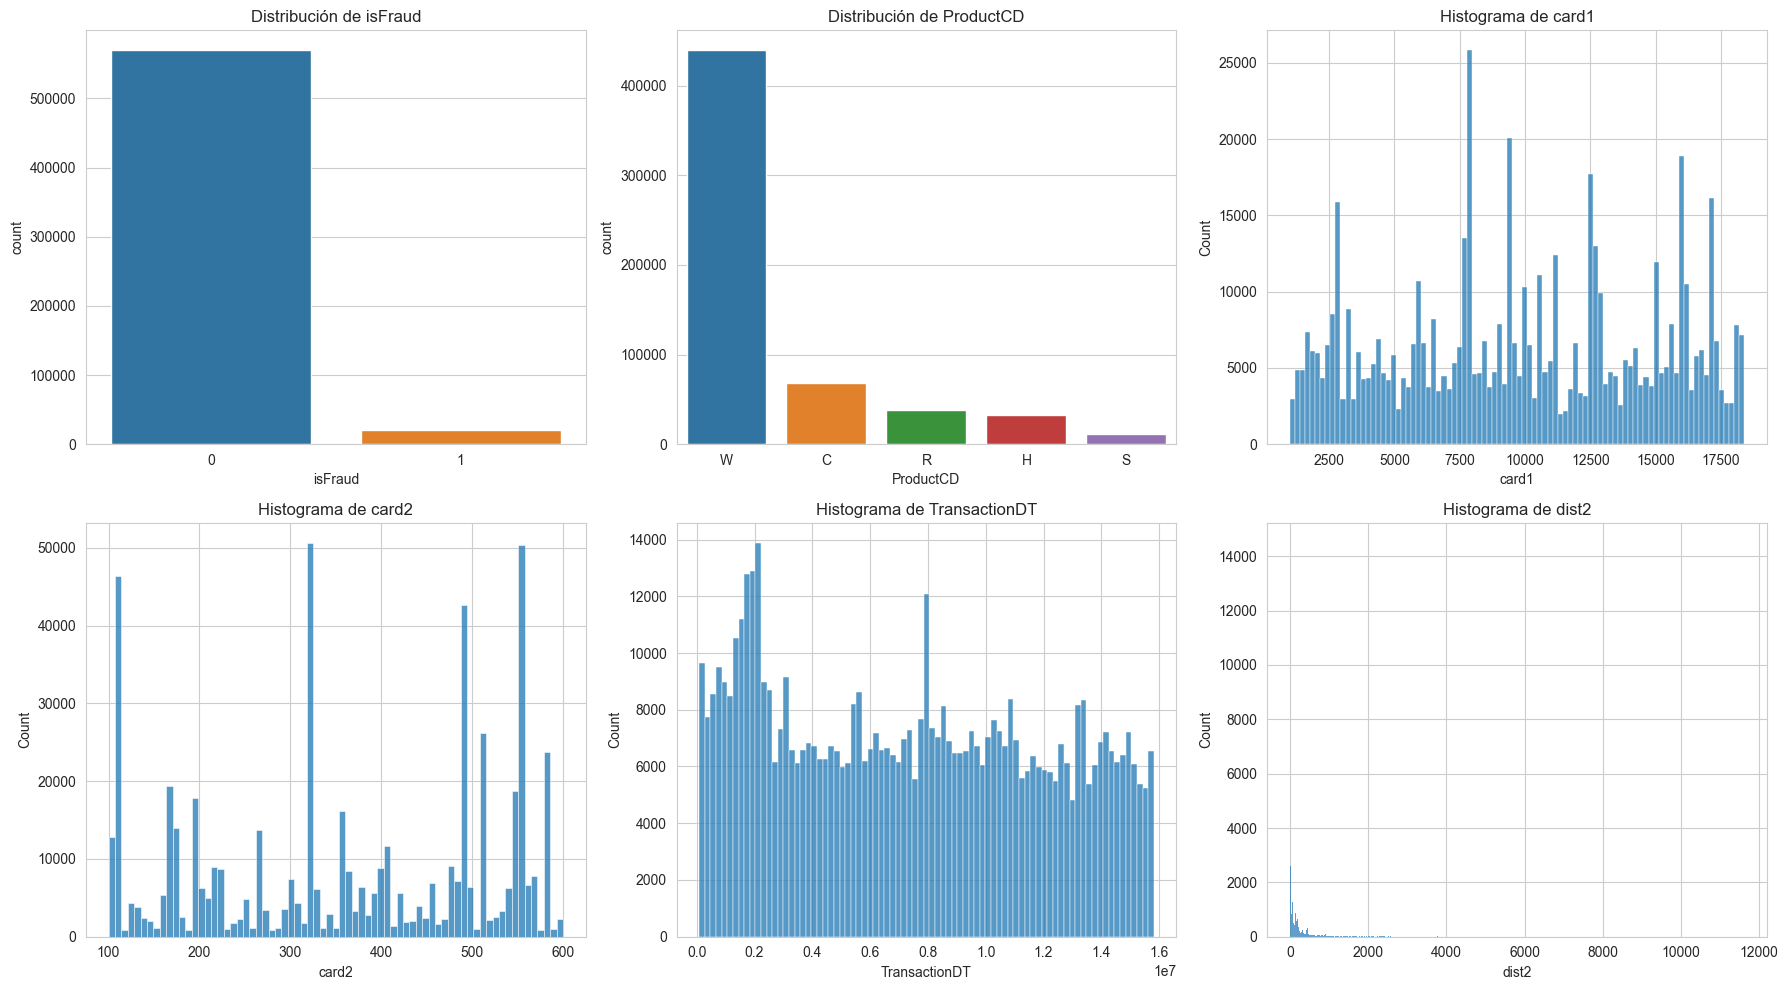

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de los gráficos
sns.set_style("whitegrid")

# Crear una figura con varios subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Histograma para la variable respuesta 'isFraud'
sns.countplot(data=fraud_det, x='isFraud', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de isFraud')

# Variables independientes seleccionadas
selected_columns = ['ProductCD', 'card1', 'card2','TransactionDT','dist2']

for i, col in enumerate(selected_columns, 1):
    if fraud_det[col].dtype == 'object':
        sns.countplot(data=fraud_det, x=col, ax=axes[i//3, i%3], order=fraud_det[col].value_counts().index)
        axes[i//3, i%3].set_title(f'Distribución de {col}')
    else:
        sns.histplot(fraud_det[col], kde=False, ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()


Distribucion de isFraud: Este grafico muestra la cantidad de transacciones fraudulentas (valor 1) y no fraudulentas (valor 0). Existe una gran cantidad de transacciones que no son fraudulentas en comparación con las fraudulentas.

Distribucion de ProductCD: Este grafico de barras muestra la frecuencia de cada categoria en la variable ProductCD.

Distribucion de card1 y card2: Estos histogramas muestran la distribucion de los valores de las variables card1 y card2.

DIstribucion de TransactionDT: Este histograma representa la distribucion del intervalo de tiempo a partir de una fecha y hora de referencia.

### Analisis de simetria y datos atipicos

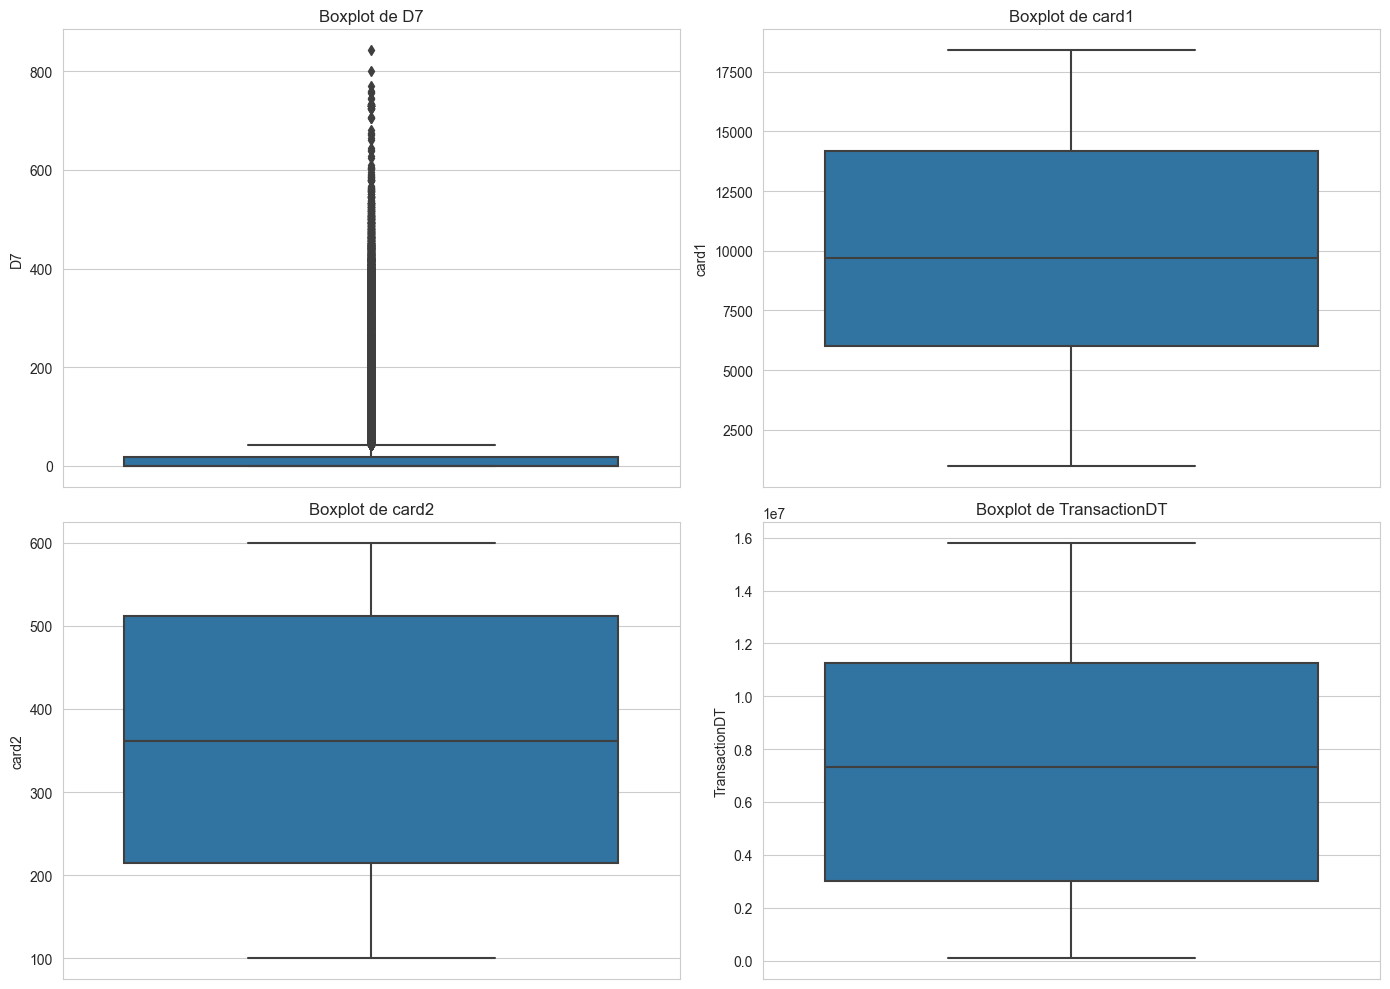

In [10]:
# Crear una figura con varios subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

selected_columns = ['D7', 'card1', 'card2','TransactionDT']

# Boxplots para las variables seleccionadas
for i, col in enumerate(selected_columns):
    if fraud_det[col].dtype != 'object':  # Solo para variables numéricas
        sns.boxplot(y=fraud_det[col], ax=axes[i//2, i%2])
        axes[i//2, i%2].set_title(f'Boxplot de {col}')
        axes[i//2, i%2].set_xlabel('')

plt.tight_layout()
plt.show()


Boxplot de TransactionAmt: La mayoría de las transacciones tienen montos más bajos, hay varios valores atípicos en el extremo superior, lo que sugiere algunas transacciones con montos significativamente más altos.

Boxplot de card1: distribución relativamente uniforme, con algunos valores atípicos en ambos extremos.

Boxplot de card2: tiene una leve asimetría hacia la derecha, con algunos valores atípicos en el extremo inferior.

Boxplot de TransactionDT: distribución relativamente uniforme, con algunos valores atípicos en ambos extremos.


### Analisis bivariado

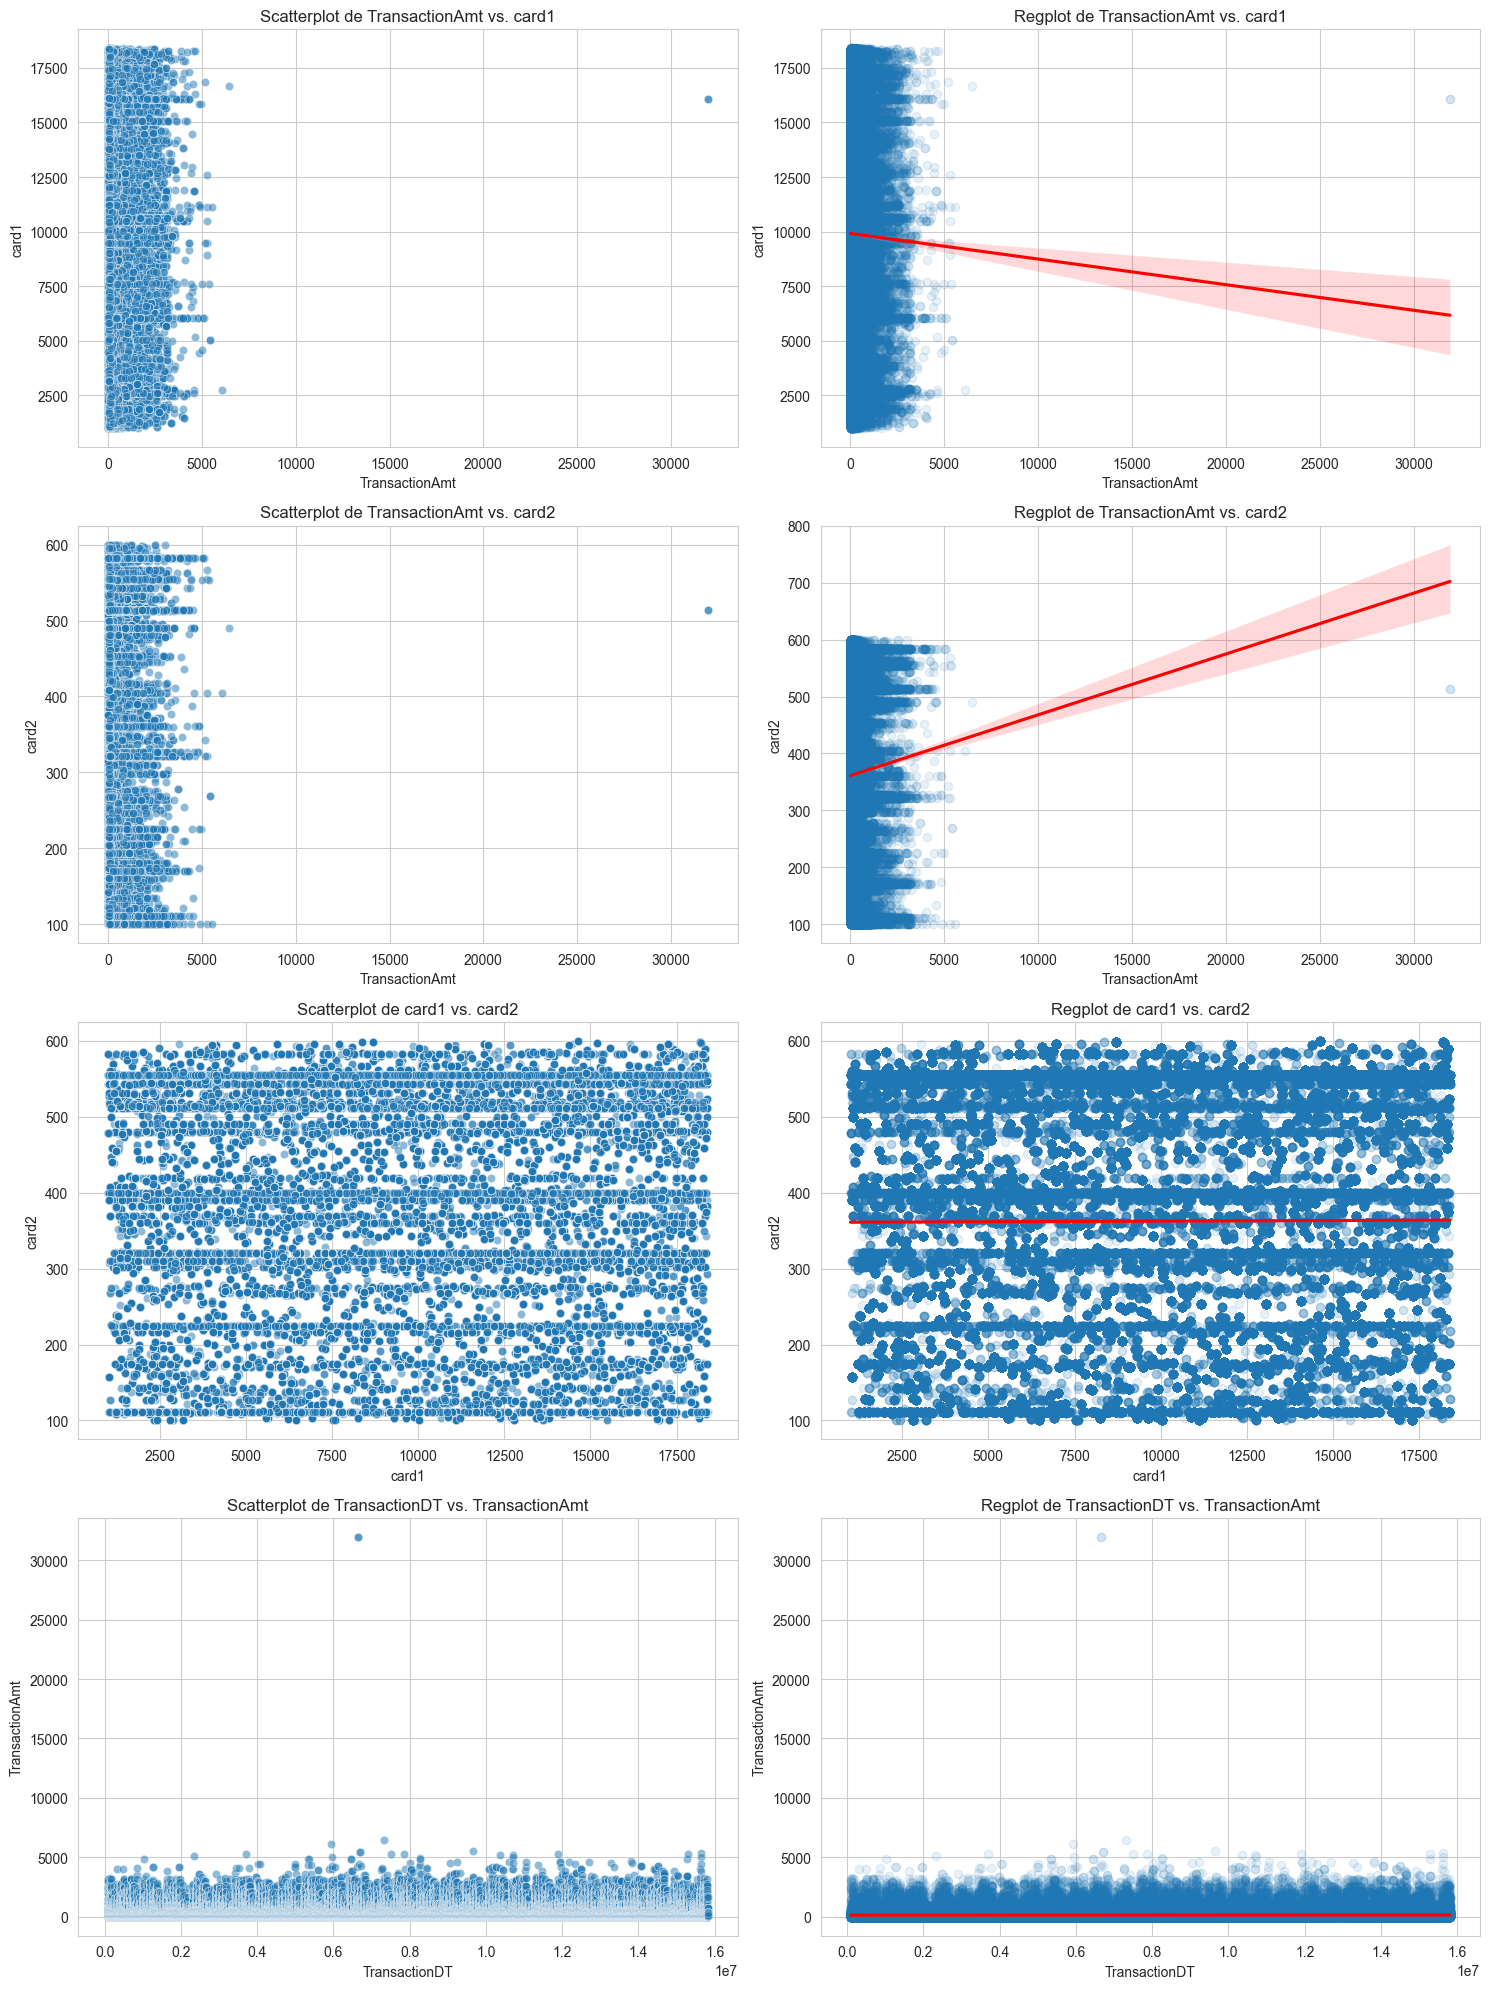

In [11]:
# Seleccionar pares de variables para el análisis bivariado
pairs = [('TransactionAmt', 'card1'), 
         ('TransactionAmt', 'card2'), 
         ('card1', 'card2'), 
         ('TransactionDT', 'TransactionAmt')]

# Crear una figura con varios subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Scatterplots y regplots para los pares seleccionados
for i, (x, y) in enumerate(pairs):
    sns.scatterplot(data=fraud_det, x=x, y=y, ax=axes[i, 0], alpha=0.5)
    axes[i, 0].set_title(f'Scatterplot de {x} vs. {y}')
    
    sns.regplot(data=fraud_det, x=x, y=y, ax=axes[i, 1], scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
    axes[i, 1].set_title(f'Regplot de {x} vs. {y}')

plt.tight_layout()
plt.show()

### Comprobación de duplicados

In [12]:
fraud_det.nunique()

TransactionID     590540
isFraud                2
TransactionDT     573349
TransactionAmt     20902
ProductCD              5
                   ...  
V335                 672
V336                 356
V337                 254
V338                 380
V339                 334
Length: 394, dtype: int64

Si una columna tiene un número muy bajo de valores únicos en comparación con el número total de filas, podría indicar que es una variable categórica o que tiene muchos valores repetidos.
Si una columna tiene un número de valores únicos cercano al número total de filas, es probable que sea una variable continua o un identificador único.

Ejemplo:

TransactionID:

Tiene 590.540 valores únicos. Esto sugiere que cada TransactionID es único para cada fila, lo que tiene sentido ya que es un identificador único para cada transacción.

isFraud:

Tiene 2 valores únicos. Esto significa que en la columna 2 valores diferentes 1 o 0.

### Conteo de datos faltantes y porcentaje

In [13]:
fraud_det.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [14]:
(fraud_det.isnull().sum()/(len(fraud_det)))*100

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
V335              86.054967
V336              86.054967
V337              86.054967
V338              86.054967
V339              86.054967
Length: 394, dtype: float64

In [15]:
import pandas as pd
# Calcula el número de datos nulos en cada columna
null_counts = fraud_det.isnull().sum()

# Determina cuántas columnas tienen al menos un dato nulo
columns_with_nulls = null_counts[null_counts > 0].shape[0]

print(f"El DataFrame tiene {columns_with_nulls} columnas con datos nulos.")


El DataFrame tiene 374 columnas con datos nulos.


# Preprocesamiento

### Identificar variables categoricas y numericas.

In [16]:
import numpy as np
cat_cols=fraud_det.select_dtypes(include=['object']).columns
num_cols = fraud_det.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')
Numerical Variables:
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70'

### Imputacion de datos

Se imputan datos NAN con la moda en variables categoricas y con la media en variables numericasde cada columna.

In [17]:
# Handling missing values
# For simplicity, we'll fill missing numerical values with the mean of the column and categorical values with the mode.

for col in fraud_det.columns:
    if fraud_det[col].dtype == 'object':
        fraud_det[col].fillna(fraud_det[col].mode()[0], inplace=True)
    else:
        fraud_det[col].fillna(fraud_det[col].median(), inplace=True)

# Check for any remaining missing values
missing_values = fraud_det.isnull().sum().sum()

missing_values

0

### Codificacion de variables categoricas mediante OneHotEcoder.

In [18]:
# One-Hot encoding for categorical variables
fraud_det_encoded = pd.get_dummies(fraud_det, drop_first=True)

# Display the shape and the first few rows of the encoded dataset
fraud_det_encoded.shape #fraud_det_encoded.head()


(590540, 517)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into training and test sets
X = fraud_det_encoded.drop('isFraud', axis=1)
y = fraud_det_encoded['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((472432, 516), (118108, 516))

# Modelos de clasificacion

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, Lasso, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    'Ridge': RidgeClassifier(),
    #'Logistic (Lasso)': LogisticRegression(penalty='l1', solver='saga', max_iter=10000),
    'Naive Bayes': GaussianNB(),
    #'SVM': SVC(probability=True),
    'MLP': MLPClassifier(max_iter=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Training the classifiers and storing their predictions
predictions = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    predictions[name] = clf.predict(X_test_scaled)

# Calculate metrics for each classifier
results = {}
for name, pred in predictions.items():
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    results[name] = [precision, recall, f1, auc]

# Convert results into a DataFrame for better visualization
metrics_df = pd.DataFrame(results, index=['Precision', 'Recall', 'F1 Score', 'AUC']).T
metrics_df


c:\Users\juacevedo.ATLANTICQI\AppData\Local\miniconda3\envs\ml_venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


,Precision,Recall,F1 Score,AUC
KNN,0.818655,0.533027,0.645662,0.764373
Ridge,0.904615,0.142270,0.245871,0.570863
Naive Bayes,0.036404,0.991774,0.070230,0.519910
MLP,0.761175,0.576821,0.656297,0.785129
XGBoost,0.913336,0.492136,0.639623,0.745222


Basado en la metrica AUC el modelo MLP presenta el valor mas alto (78.51%), por lo tanto es el modelo que tiene la mejor capacidad para generalizar la clasificacion de fraudes comparada con los modelos restantes.